In [7]:
# text classification
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

from transformers import BertTokenizer
from transformers import pipeline

from transformers import logging
logging.set_verbosity_error()

In [8]:
train_data = pd.read_csv('D:/Code/Python/pythonTutorial/R10_PBL/train.csv')
test_data = pd.read_csv('D:/Code/Python/pythonTutorial/R10_PBL/test.csv')
topics = {1: 'world',
          2: 'sports',
          3: 'business',
          4: 'science'}  # Originally "Sci/Tech"

In [9]:
sample = train_data.sample()

topic = topics[sample['Class Index'].item()]
title = sample['Title'].item()
description = sample['Description'].item()

news_article = title + ". " + description

In [10]:
from IPython.display import Markdown, display # type: ignore


def print_news_article(topic, news_article):
    display(Markdown('**News topic: "{}":**'.format(topic) + '<br>'
                     + news_article))

In [11]:
def plot_output(output, prompts):
    sns.set_theme(style="darkgrid")

    fig = plt.figure(figsize=(14, 4))
    n_rows = math.ceil(len(prompts) / 3)
    n_cols = 3 if len(prompts) > 3 else len(prompts)
    counter = 1

    for i, (pt, o) in enumerate(zip(prompt_templates, output)):  # type: ignore
        df = pd.DataFrame(o)
        ax = plt.subplot(n_rows, n_cols, counter)
        plt.title(pt)
        plt.xlabel('News topic')
        sbp = sns.barplot(x="token_str", y="score", data=df,
                          ax=ax, palette='Blues', order=topics.values())
        sbp.set(xlabel=None)
        sbp.set(ylabel=None)
        counter += 1

    sns.despine(bottom=True, left=True, fig=fig)
    fig.show()

**News topic: "science":**<br>US tech execs more optimistic about spending: Study. New York, August 31: US technology executives are increasingly optimistic about the business climate, although plans for increased technology spending remain modest, according to a study released on Monday.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1592\719879411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbp = sns.barplot(x="token_str", y="score", data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1592\719879411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbp = sns.barplot(x="token_str", y="score", data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1592\719879411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbp = sns.barplot(x="token_str", y="score", data=df,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1592\719879411.py:21: UserWarning: Matplotlib is

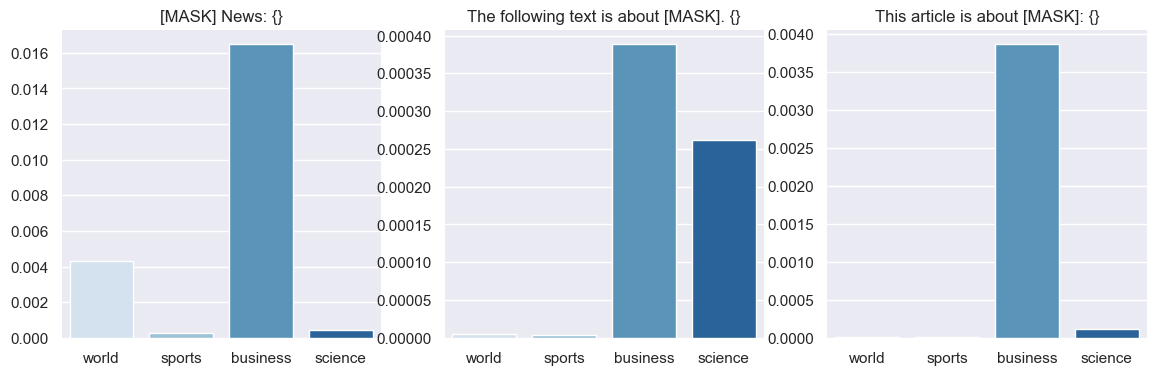

In [12]:
prompt_templates = [
    '[MASK] News: {}',
    'The following text is about [MASK]. {}',
    'This article is about [MASK]: {}'
]
class_labels = ['world', 'sports', 'business', 'science']

prompts = [[pt.format(news_article)] for pt in prompt_templates]

unmasker = pipeline('fill-mask', model='bert-base-uncased',
                    targets=class_labels)
output = unmasker(prompts)

print_news_article(topic, news_article)
plot_output(output, prompt_templates)